<a href="https://colab.research.google.com/github/AmanPriyanshu/Discussing_Learning/blob/master/Iterative_Implementation_of_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## INTRODUCTION:
KNN is one of the most useful Classification Algorithms. It has a simple method and learns veru well for a certain cases, however, its implementation in regression too isn't lacking. Here, we will introduce a step-up to the already present regression method in KNN.

## UPLOADING DATASET:

In [1]:
from google.colab import files
uploaded = files.upload()

Saving housing.csv to housing.csv


## IMPORTS:

In [2]:
import pandas as pd
import numpy as np
import math
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import random
from tqdm import tqdm
from matplotlib import pyplot as plt

## LOADING DATASET:

In [3]:
data = pd.read_csv('housing.csv')
features = data.columns
data = data.values
print(features)
print('data',data.shape,'\n',data)

Index(['RM', 'LSTAT', 'PTRATIO', 'MEDV'], dtype='object')
data (489, 4) 
 [[6.575e+00 4.980e+00 1.530e+01 5.040e+05]
 [6.421e+00 9.140e+00 1.780e+01 4.536e+05]
 [7.185e+00 4.030e+00 1.780e+01 7.287e+05]
 ...
 [6.976e+00 5.640e+00 2.100e+01 5.019e+05]
 [6.794e+00 6.480e+00 2.100e+01 4.620e+05]
 [6.030e+00 7.880e+00 2.100e+01 2.499e+05]]


## SCALING:

In [4]:
scaler = StandardScaler()
scaler.fit(data)
data = scaler.transform(data)

## SPLITING TO X and Y

In [5]:
x = data.T[:-1].T
y = data.T[-1]

print('X', x.shape, '\n', x)
print('Y', y.shape, '\n', y[:10])

X (489, 3) 
 [[ 0.52055395 -1.1250769  -1.5250831 ]
 [ 0.28104837 -0.53706982 -0.33974768]
 [ 1.46924486 -1.25935736 -0.33974768]
 ...
 [ 1.14420158 -1.03178731  1.17748167]
 [ 0.86114953 -0.91305511  1.17748167]
 [-0.32704695 -0.71516812  1.17748167]]
Y (489,) 
 [ 0.30064004 -0.00449803  1.66104726  1.49576414  1.85175855  0.89820209
  0.16078509  0.69477671 -0.65291643 -0.34777836]


## ITERATIVE KNN REGRESSION:

In [6]:
class IterKnnRegression:
  def __init__(self, x, y, k_neighbours, max_iter=1e1, epsilon=1e-3, use_corr=True):
    self.x = x
    self.y = y
    self.k_neighbours = k_neighbours
    self.x_current = x
    self.y_current = y
    self.correlations = []
    self.use_corr = use_corr
    self.epsilon = epsilon
    self.max_iter = max_iter

  def correlation_coeff_per_feature(self):
    for feature in self.x.T:
      corr = np.sum( (feature - np.mean(feature)) * (self.y - np.mean(self.y)) )/(np.sqrt(np.sum(np.square( feature - np.mean(feature) ) ) * np.sum(np.square( self.y - np.mean(self.y) ) ) ))
      self.correlations.append(corr)

  def predict_once(self, predict_x):
    
    if self.use_corr == True:
      distances = np.array([np.sum(np.square(x - predict_x) * np.array(np.square(self.correlations))) for x in self.x_current])
    else:
      distances = np.array([np.sum(np.square(x - predict_x)) for x in self.x_current])
    
    sorted_index = np.argsort(distances)
    dist = distances[sorted_index][0]
    if dist<=self.epsilon:
      completed = True
    else:
      completed = False
    x_nearest = self.x_current[sorted_index][:self.k_neighbours]
    y_nearest = self.y_current[sorted_index][:self.k_neighbours]
    x_regressed = np.array([np.mean(x_nearest, axis=0)])
    y_regressed = np.mean(y_nearest)
    
    x_current_new = np.concatenate([self.x_current, x_regressed])
    y_current_new = np.concatenate([self.y_current, np.array([y_regressed])])
    
    return x_current_new, y_current_new, completed

  def predict(self, predict_x):
    
    if self.use_corr == True:
      distances = np.array([np.sum(np.square(x - predict_x) * np.array(np.square(self.correlations))) for x in self.x_current])
    else:
      distances = np.array([np.sum(np.square(x - predict_x)) for x in self.x_current])
    
    sorted_index = np.argsort(distances)
    dist = distances[sorted_index][0]
    if dist<=self.epsilon:
      completed = True
    else:
      completed = False
    x_nearest = self.x_current[sorted_index][:self.k_neighbours]
    y_nearest = self.y_current[sorted_index][:self.k_neighbours]
    x_regressed = np.array([np.mean(x_nearest, axis=0)])
    y_regressed = np.mean(y_nearest)
    return y_regressed

  def iterator(self, predict_x, cont=False):
    if cont == False:
      self.correlation_coeff_per_feature()
    for iteration in range(int(self.max_iter)):
      x_current_new, y_current_new, completed = self.predict_once(predict_x)
      self.x_current = x_current_new
      self.y_current = y_current_new
      if completed:
        break
    return self.predict(predict_x)
  
  def predict_continuous(self, cont_x):
    self.correlation_coeff_per_feature()
    cont_y = []
    for X in tqdm(cont_x):
      pred = self.iterator(X, cont=True)
      cont_y.append(pred)
      self.x_current = self.x
      self.y_current = self.y
    cont_y = np.array(cont_y)
    return cont_y



In [7]:
ikr = IterKnnRegression(x, y, 5, use_corr=True)
y_pred0 = ikr.iterator(x[0])

ikr = IterKnnRegression(x, y, 5, use_corr=False)
y_pred1 = ikr.iterator(x[0])

LET US TAKE A LOOK AT THE ORIGINAL VALUE v/s THE NEW ONES WE PREDICTED

In [8]:
original_data = np.array([np.concatenate([x[0], np.array([y[0]])])])
print(scaler.inverse_transform(original_data))

pred_data = np.array([np.concatenate([x[0], np.array([y_pred0])])])
print(scaler.inverse_transform(pred_data))

pred_data = np.array([np.concatenate([x[0], np.array([y_pred1])])])
print(scaler.inverse_transform(pred_data))

[[6.575e+00 4.980e+00 1.530e+01 5.040e+05]]
[[6.5750e+00 4.9800e+00 1.5300e+01 5.9556e+05]]
[[6.5750e+00 4.9800e+00 1.5300e+01 5.9766e+05]]


LET US TRAIN AND VALIDATE WITH 80:20 split

In [9]:
x_train = x[:int(0.8*x.shape[0])]
x_test = x[int(0.8*x.shape[0]):]

y_train = y[:int(0.8*x.shape[0])]
y_test = y[int(0.8*x.shape[0]):]

print(x_test[0].shape)

(3,)


In [10]:
ikr = IterKnnRegression(x_train, y_train, 5, use_corr=True)
y_test_pred = ikr.predict_continuous(x_test)

100%|██████████| 98/98 [00:05<00:00, 17.14it/s]


In [11]:
mae = np.mean(np.abs(y_test - y_test_pred))
print('MEAN ABSOLUTE ERROR',mae)

MEAN ABSOLUTE ERROR 0.3858647854121595


## COMPARISON:

Comparing with a simple ANN model.

In [12]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Dense(x_train.shape[1]//2, activation='relu', input_shape=(x_train.shape[1],)),
                                    tf.keras.layers.Dense(1, activation='linear')
                                    ])
model.compile(optimizer='adam', loss='mae')
model.fit(x_train, y_train, epochs=1000, verbose=0)
model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 0.5093


0.5092971920967102

## PLOTTING COMPARISON:

Let us create a 2-D dataset mapping over say y = 10 * x + 15 + error, we will predict values using both Iterative KNN Regression Model and Linear Regression

### DATA CREATION:

In [13]:
y = np.array([10*(i/4)+15+random.random()*1000 for i in range(-2000, 2000)])
x = np.array([[i/4] for i in range(-2000, 2000)])

indexes = np.arange(y.shape[0])
np.random.shuffle(indexes)
x = x[indexes]
y = y[indexes]

print('X', x.shape, '\n', x)
print()
print('Y', y.shape, '\n', y)

X (4000, 1) 
 [[ 147.75]
 [-388.5 ]
 [ 399.  ]
 ...
 [ -78.25]
 [  -4.  ]
 [ 146.75]]

Y (4000,) 
 [ 1545.67434789 -3074.84514199  4467.30188191 ...  -347.12212958
   535.18148701  1560.93710571]


## SPLITTING INTO TEST AND TRAIN:

In [14]:
x_train = x[:int(0.8*x.shape[0])]
x_test = x[int(0.8*x.shape[0]):]

y_train = y[:int(0.8*x.shape[0])]
y_test = y[int(0.8*x.shape[0]):]

print(x_test.shape)

(800, 1)


## IMPLEMENTING LINEAR:

In [15]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Dense(1, activation='linear', input_shape=(x_train.shape[1],))
                                  ])
model.compile(optimizer='adam', loss='mae')
model.fit(x_train, y_train, epochs=1000, verbose=0)
model.evaluate(x_test, y_test)

25/25 [==============================] - 0s 1ms/step - loss: 415.4731


415.4730529785156

In [16]:
y_test_pred_linear = model.predict(x_test)

## IMPLEMENTING Iterative-KNN-Regression

In [17]:
ikr = IterKnnRegression(x_train, y_train, 5, use_corr=True)
y_test_pred_ikr = ikr.predict_continuous(x_test)

mae = np.mean(np.abs(y_test - y_test_pred_ikr))
print()
print('MEAN ABSOLUTE ERROR',mae)

100%|██████████| 800/800 [03:35<00:00,  3.71it/s]


MEAN ABSOLUTE ERROR 268.15552016491694


## PLOTTING ALL THREE:

In [18]:
indexes = np.argsort(x_test.flatten())

[]

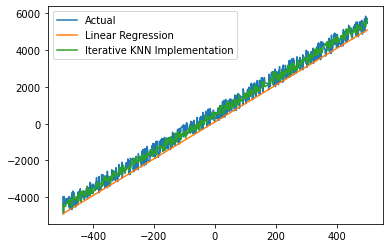

In [19]:
plt.plot(x_test.flatten()[indexes], y_test[indexes], label='Actual')
plt.plot(x_test.flatten()[indexes], y_test_pred_linear[indexes], label='Linear Regression')
plt.plot(x_test.flatten()[indexes], y_test_pred_ikr[indexes], label='Iterative KNN Implementation')
plt.legend(loc='best')
plt.plot()

Well, we can't see any difference from here, even if we zoom in, and I have no clue where, how to see the difference. Here, is a zoomed in pic to x belongs to [-10, 10] 

[]

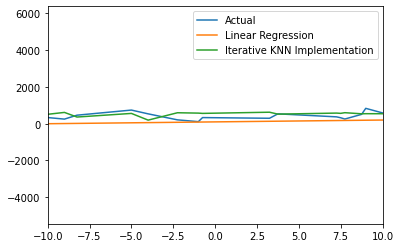

In [20]:
plt.plot(x_test.flatten()[indexes], y_test[indexes], label='Actual')
plt.plot(x_test.flatten()[indexes], y_test_pred_linear[indexes], label='Linear Regression')
plt.plot(x_test.flatten()[indexes], y_test_pred_ikr[indexes], label='Iterative KNN Implementation')
plt.legend(loc='best')
plt.xlim([-10, 10])
plt.plot()

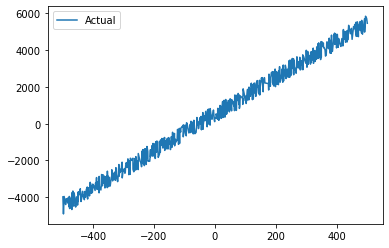

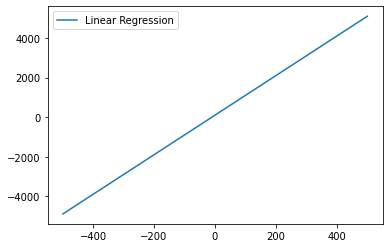

[]

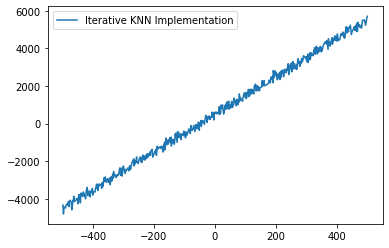

In [21]:
plt.plot(x_test.flatten()[indexes], y_test[indexes], label='Actual')
plt.legend(loc='best')
plt.pause(0.1)
plt.plot(x_test.flatten()[indexes], y_test_pred_linear[indexes], label='Linear Regression')
plt.legend(loc='best')
plt.pause(0.1)
plt.plot(x_test.flatten()[indexes], y_test_pred_ikr[indexes], label='Iterative KNN Implementation')
plt.legend(loc='best')
plt.plot()

So, we can see that KNN fits better, but we should also understand that this thing will definitely overfit at some point. So, some care must be taken, when evaluating it. But, it gives better results than Linear Regression as of now.

Well, the intersting bit, is that KNN will fit to almost any curve since it depends on neighbours. So, it can be used as a replacement for ANN's etc. I hope this implementation wasn't too stupid. But, yes I just used a simple interpolation concept to force it get closer to the actual value.